# Trader Performance Analysis Across Market Sentiment Regimes

This notebook analyzes trader performance across different market sentiment regimes using historical trading data and market sentiment indices. The analysis includes data cleaning, merging, statistical tests, and a variety of visualizations (bar plots, violin plots, subplots, and heatmaps) to uncover insights about trading behavior and outcomes under varying market conditions.

## 1. Import Required Libraries

Import pandas, numpy, matplotlib, seaborn, and scipy for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kruskal

## 2. Load Datasets

Load the market sentiment and trader historical data CSV files into pandas DataFrames.

In [2]:
df_market = pd.read_csv(r"C:\Users\chidw\OneDrive\Desktop\AnythingAI\fear_greed_index.csv")
df_trader = pd.read_csv(r"C:\Users\chidw\OneDrive\Desktop\AnythingAI\historical_data.csv")

## 3. Initial Data Exploration

Display the first few rows and shapes of both datasets to understand their structure.

In [3]:
print("Market Sentiment Data:")
display(df_market.head())
print("Shape:", df_market.shape)

print("\nTrader Historical Data:")
display(df_trader.head())
print("Shape:", df_trader.shape)

Market Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Shape: (2644, 4)

Trader Historical Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Shape: (211224, 16)


## 4. Data Cleaning and Preprocessing

Check data types, convert timestamps to datetime, and add a 'date' column for merging.

In [4]:
print("Market Data Types:")
print(df_market.dtypes)
print("\nTrader Data Types:")
print(df_trader.dtypes)

# Convert timestamps to datetime and add 'date' columns
df_trader['Timestamp IST'] = pd.to_datetime(df_trader['Timestamp IST'])
df_trader['date'] = df_trader['Timestamp IST'].dt.date
df_market['date'] = pd.to_datetime(df_market['date']).dt.date

Market Data Types:
timestamp          int64
value              int64
classification    object
date              object
dtype: object

Trader Data Types:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


## 5. Merge Datasets

Merge trader and market sentiment data on the 'date' column using a left join.

In [5]:
df = df_trader.merge(df_market, on='date', how='left')
display(df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed


## 6. Drop Unnecessary Columns

Remove columns such as timestamps and transaction IDs that are not needed for analysis.

In [6]:
cols_to_drop = ['Timestamp IST', 'timestamp', 'Timestamp', 'Transaction Hash', 'Order ID', 'Trade ID']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee', 'date', 'value', 'classification']


## 7. Handle Missing Values

Identify and drop rows with missing values in key columns like 'value' and 'classification'.

In [7]:
print("Missing values per column:")
print(df.isnull().sum())
df = df.dropna(subset=['value', 'classification'])
print("Shape after dropping missing:", df.shape)

Missing values per column:
Account                0
Coin                   0
Execution Price        0
Size Tokens            0
Size USD               0
Side                   0
Start Position         0
Direction              0
Closed PnL             0
Crossed                0
Fee                    0
date                   0
value              43367
classification     43367
dtype: int64
Shape after dropping missing: (167857, 14)


## 8. Basic Trader Analysis

Count the number of unique traders in the cleaned dataset.

In [8]:
num_traders = df['Account'].nunique()
print(f"Number of unique traders: {num_traders}")

Number of unique traders: 32


## 9. Bar Plot: Mean Closed PnL by Classification

Plot a bar chart showing the mean Closed PnL for each sentiment classification, with value annotations.

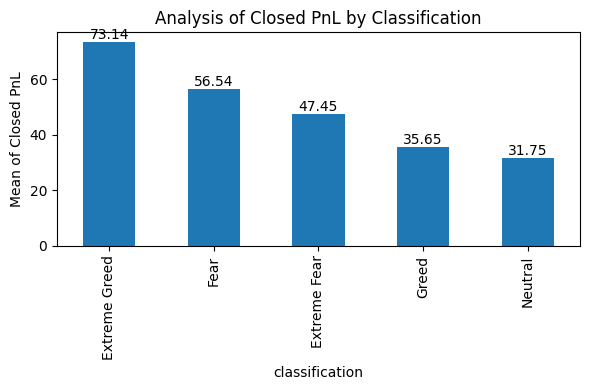

In [9]:
means = df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
ax = means.plot(kind='bar', figsize=(6, 4), title='Analysis of Closed PnL by Classification')
ax.set_ylabel('Mean of Closed PnL')
for i, val in enumerate(means):
    ax.text(i, val, f'{val:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

## 10. Correlation and Statistical Tests

Calculate Pearson and Spearman correlations between sentiment score and Closed PnL, and perform a Kruskal-Wallis test.

In [10]:
sentiment_order = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
df['sentiment_score'] = df['classification'].map(sentiment_order)
pearson_corr, _ = pearsonr(df['sentiment_score'], df['Closed PnL'])
spearman_corr, _ = spearmanr(df['sentiment_score'], df['Closed PnL'])
print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}")

groups = [g['Closed PnL'].dropna() for name, g in df.groupby('classification')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p:.4f}")

Pearson correlation: 0.004
Spearman correlation: 0.047
Kruskal-Wallis p-value: 0.0000


## 11. Violin Plot: Closed PnL by Sentiment Regime

Create a violin plot to visualize the distribution of Closed PnL across sentiment regimes.

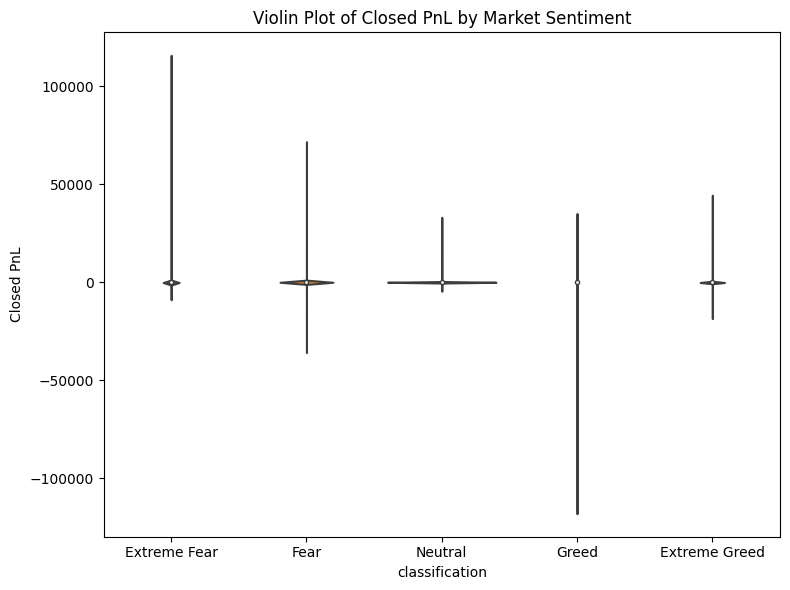

In [11]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='classification', y='Closed PnL', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Violin Plot of Closed PnL by Market Sentiment')
plt.tight_layout()
plt.show()

## 12. Time Series Plot: Total Closed PnL Over Time

Plot the total Closed PnL aggregated by date as a time series line plot.

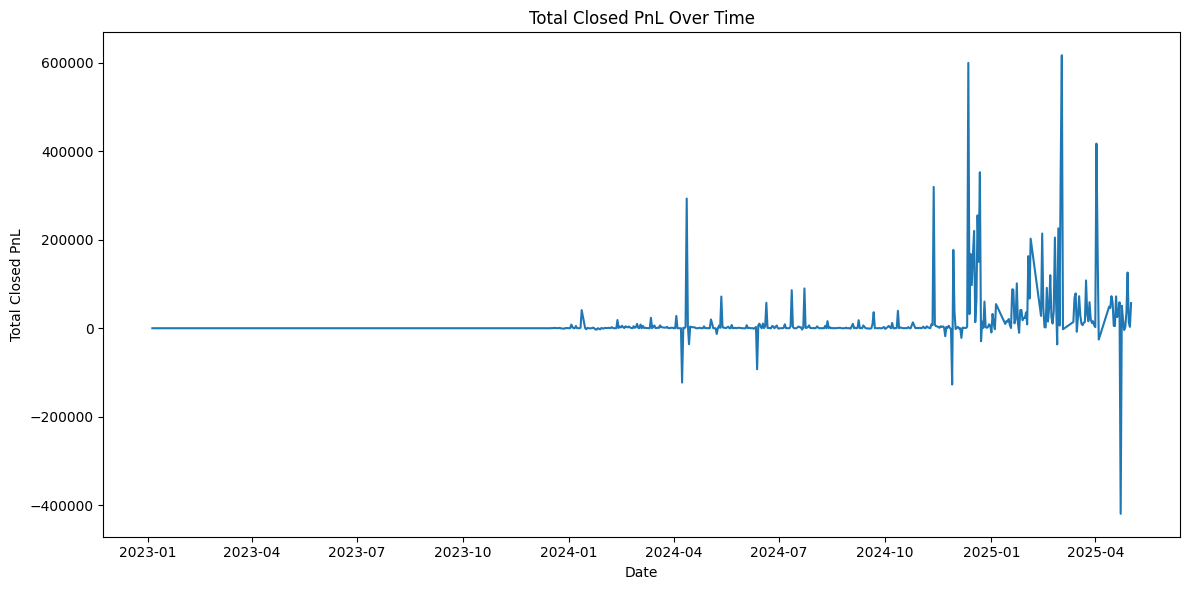

In [12]:
df['date'] = pd.to_datetime(df['date'])
daily_pnl = df.groupby('date')['Closed PnL'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(daily_pnl['date'], daily_pnl['Closed PnL'])
plt.title('Total Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Total Closed PnL')
plt.tight_layout()
plt.show()

## 13. Compute Trading Metrics Function

Define a function to compute trading metrics (e.g., WinRate, Sharpe, ProfitFactor, MaxDrawdown) grouped by sentiment or trader.

In [13]:
def compute_trading_metrics(df, group_by='classification'):
    """
    Returns trading performance metrics grouped by sentiment or trader.
    group_by: 'classification' or 'Account' or ['Account', 'classification']
    """
    df = df.copy()
    df['is_win'] = df['Closed PnL'] > 0
    df['ROI'] = df['Closed PnL'] / df['Size USD']
    grouped = df.groupby(group_by)
    metrics = grouped.agg(
        Trades=('Closed PnL', 'count'),
        WinRate=('is_win', 'mean'),
        AvgPnL=('Closed PnL', 'mean'),
        TotalPnL=('Closed PnL', 'sum'),
        StdPnL=('Closed PnL', 'std'),
        AvgROI=('ROI', 'mean'),
        TotalROI=('ROI', 'sum')
    ).reset_index()
    # Add Sharpe Ratio
    metrics['Sharpe'] = metrics['AvgPnL'] / metrics['StdPnL']
    def profit_factor(sub_df):
        profit = sub_df[sub_df['Closed PnL'] > 0]['Closed PnL'].sum()
        loss = abs(sub_df[sub_df['Closed PnL'] < 0]['Closed PnL'].sum())
        return profit / loss if loss > 0 else float('inf')
    pf = grouped.apply(profit_factor).reset_index(name='ProfitFactor')
    metrics = metrics.merge(pf, on=group_by)
    def max_drawdown(sub_df):
        cumsum = sub_df['Closed PnL'].cumsum()
        running_max = cumsum.cummax()
        drawdown = running_max - cumsum
        return drawdown.max() if not drawdown.empty else 0
    dd = grouped.apply(max_drawdown).reset_index(name='MaxDrawdown')
    metrics = metrics.merge(dd, on=group_by)
    return metrics

## 14. Bar Plot: Total PnL by Market Sentiment

Visualize total PnL for each market sentiment using a bar plot.

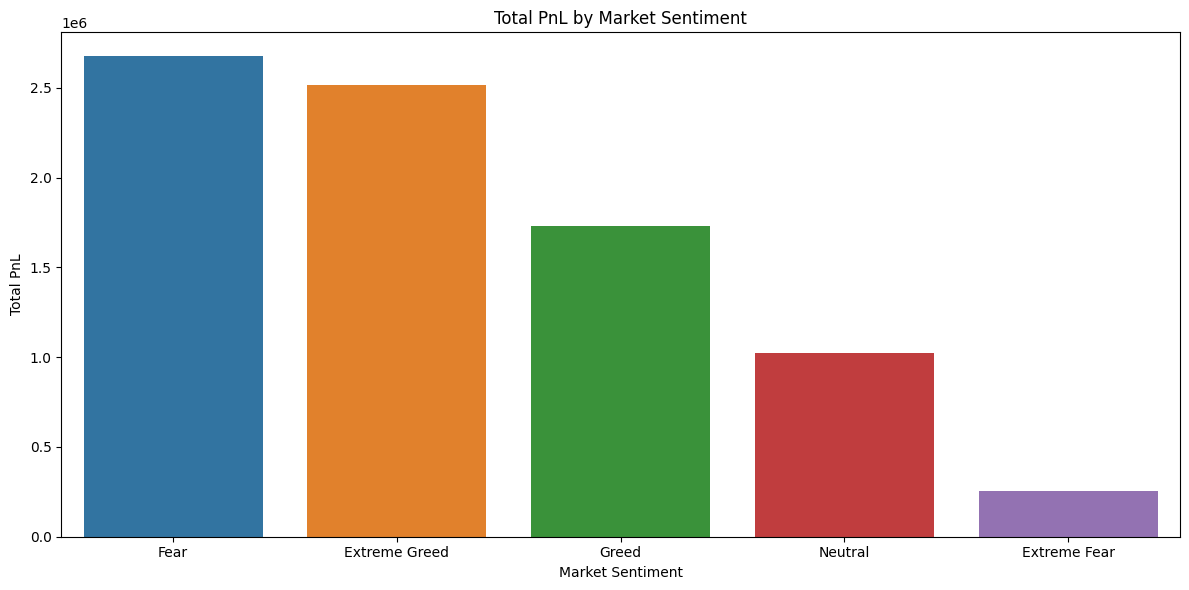

In [14]:
sentiment_metrics = compute_trading_metrics(df, group_by='classification')
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_metrics.sort_values(by='TotalPnL',ascending=False), x='classification', y='TotalPnL')
plt.title('Total PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total PnL')
plt.tight_layout()
plt.show()

## 15. Bar Plot: Total PnL by Trader

Show the top 10 traders by total PnL using a bar plot with rotated x-axis labels.

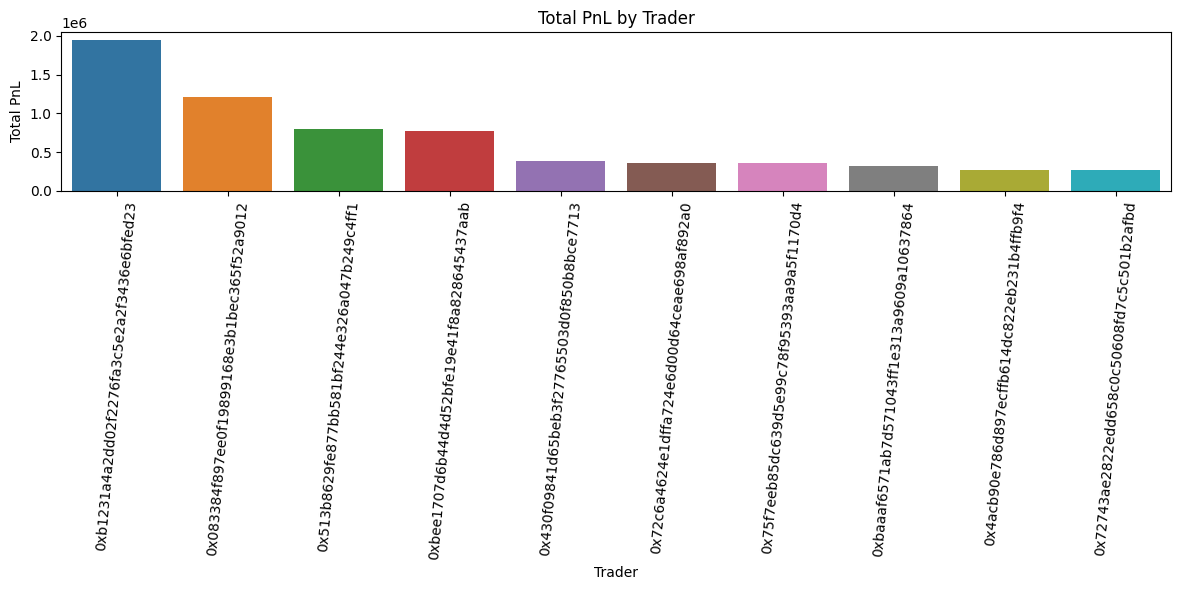

In [15]:
trader_metrics = compute_trading_metrics(df, group_by='Account')
plt.figure(figsize=(12, 6))
sns.barplot(data=trader_metrics.sort_values(by='TotalPnL',ascending=False).head(10), x='Account', y='TotalPnL')
plt.title('Total PnL by Trader')
plt.xlabel('Trader')
plt.ylabel('Total PnL')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

## 16. Top Combo Traders by Sentiment Subplots

Create subplots for each sentiment regime, showing the top 5 traders by TotalPnL in each regime.

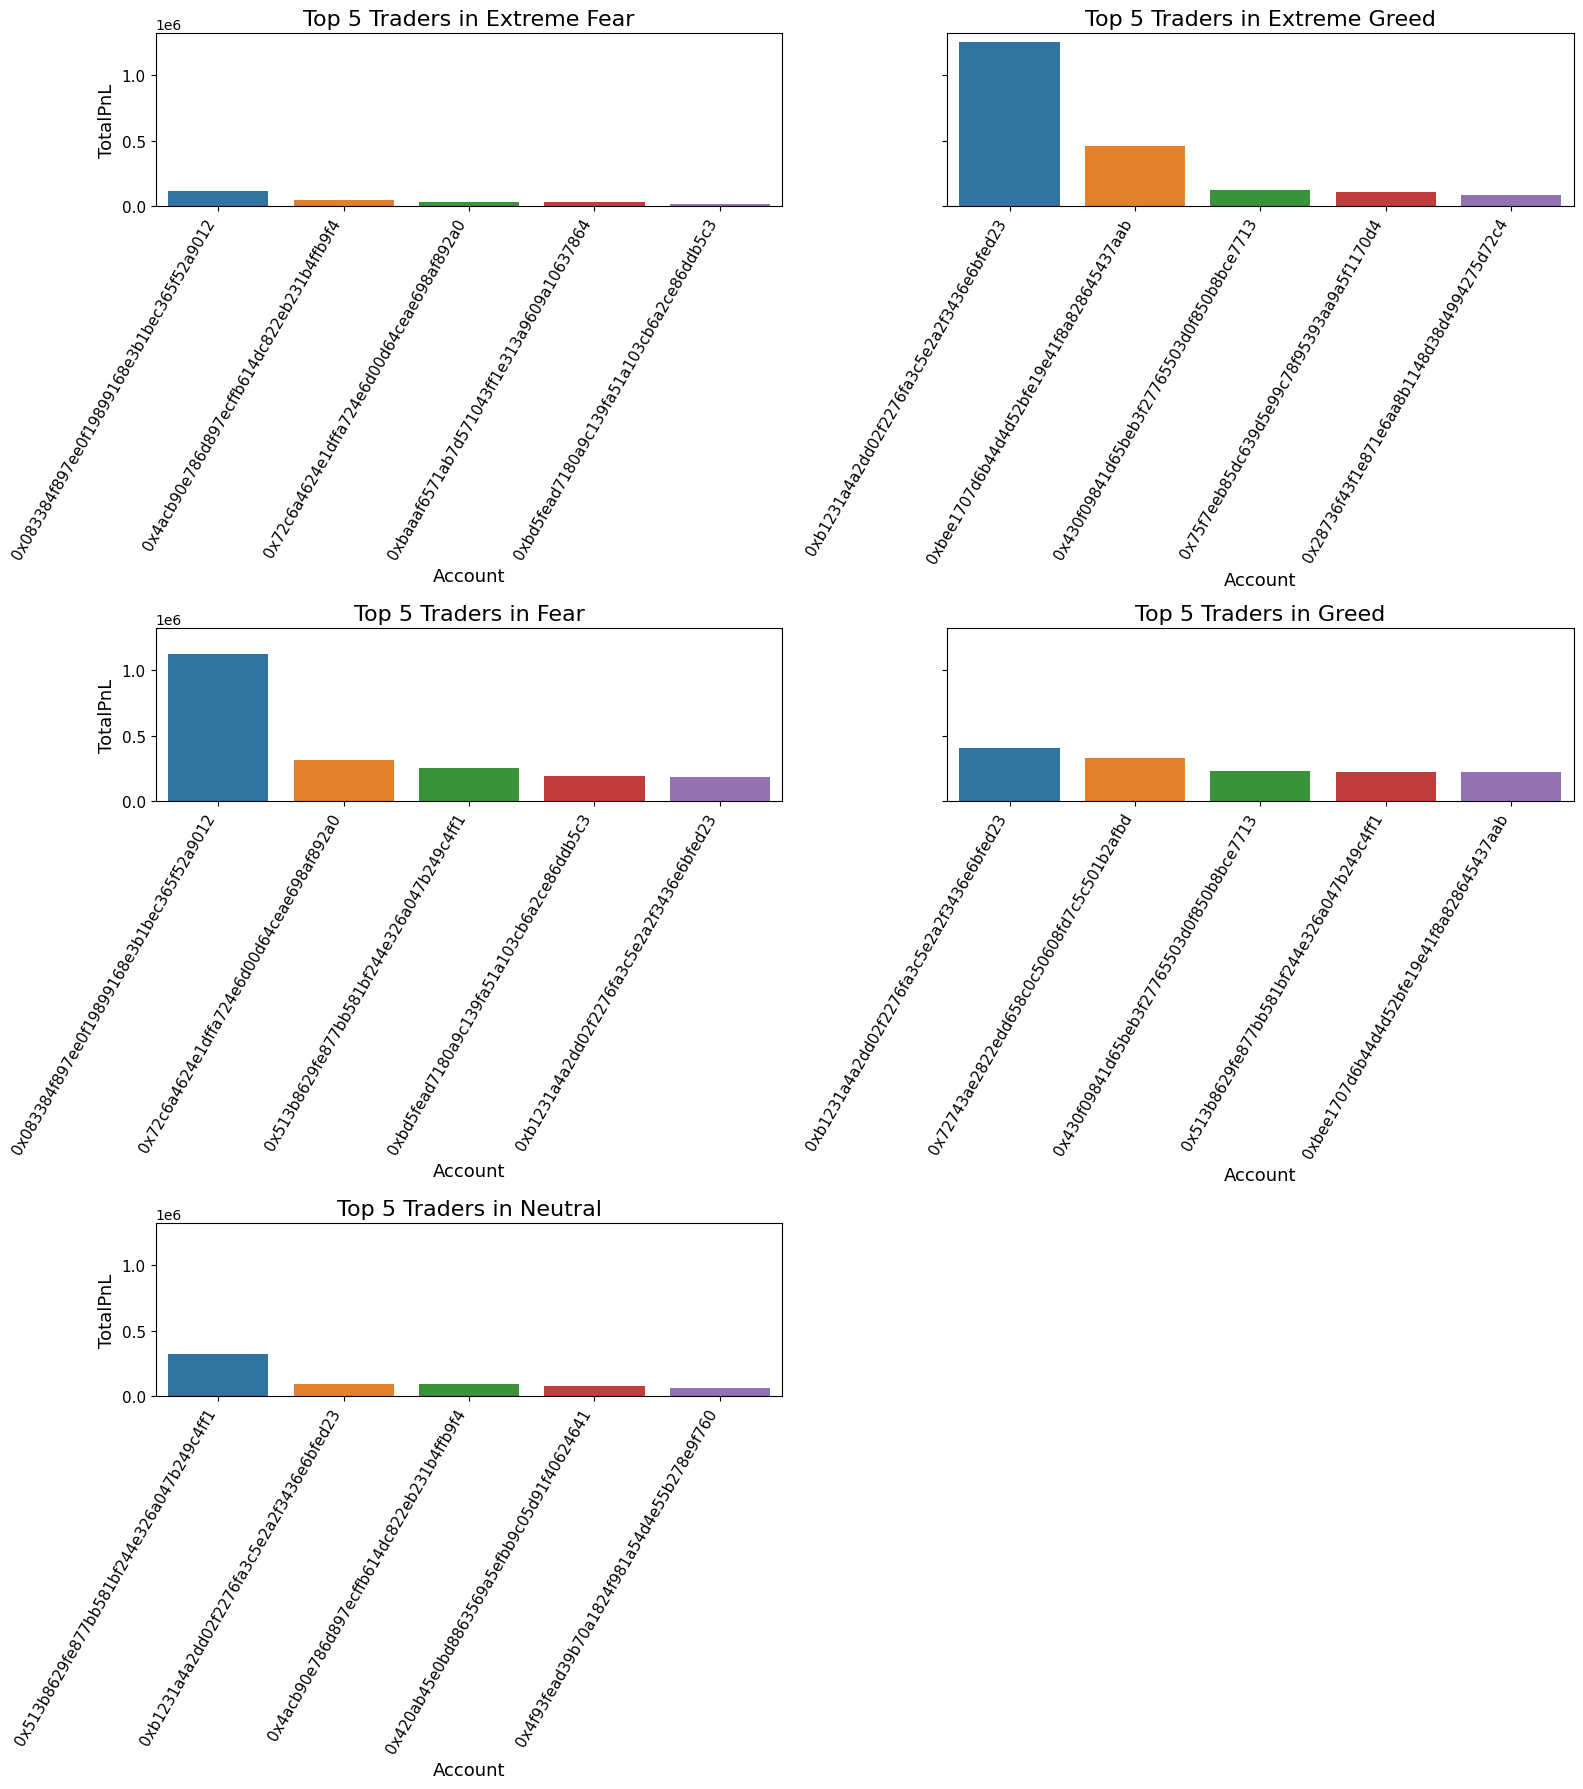

In [16]:
combo_metrics = compute_trading_metrics(df, group_by=['Account', 'classification'])
def get_top_combo_traders(combo_df, metric='TotalPnL', top_n=5):
    top_traders = (
        combo_df.sort_values(['classification', metric], ascending=[True, False])
        .groupby('classification')
        .head(top_n)
    )
    return top_traders
top5_combo = get_top_combo_traders(combo_metrics, metric='TotalPnL', top_n=5)

sentiments = top5_combo['classification'].unique()
n = len(sentiments)
ncols = 2
nrows = (n + ncols - 1) // ncols  # ensures enough rows

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 6 * nrows), sharey=True)
axes = axes.flatten()

for i, sentiment in enumerate(sentiments):
    subset = top5_combo[top5_combo['classification'] == sentiment]
    ax = axes[i]
    sns.barplot(data=subset, x='Account', y='TotalPnL', ax=ax)
    ax.set_title(f'Top 5 Traders in {sentiment}', fontsize=16)
    ax.set_xlabel('Account', fontsize=13)
    ax.set_ylabel('TotalPnL' if i % ncols == 0 else '', fontsize=13)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)
    ax.tick_params(axis='y', labelsize=11)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 17. Correlation Analysis and Bar Plot

Compute correlations between sentiment score and various trading metrics, and plot them as a bar chart.

Correlation between sentiment_score and trading outcome metrics:
AvgPnL: 0.288
WinRate: 0.830
StdPnL: -0.494
ProfitFactor: -0.000
Sharpe: 0.457
MaxDrawdown: 0.516
Trades: 0.538
AvgROI: 0.837


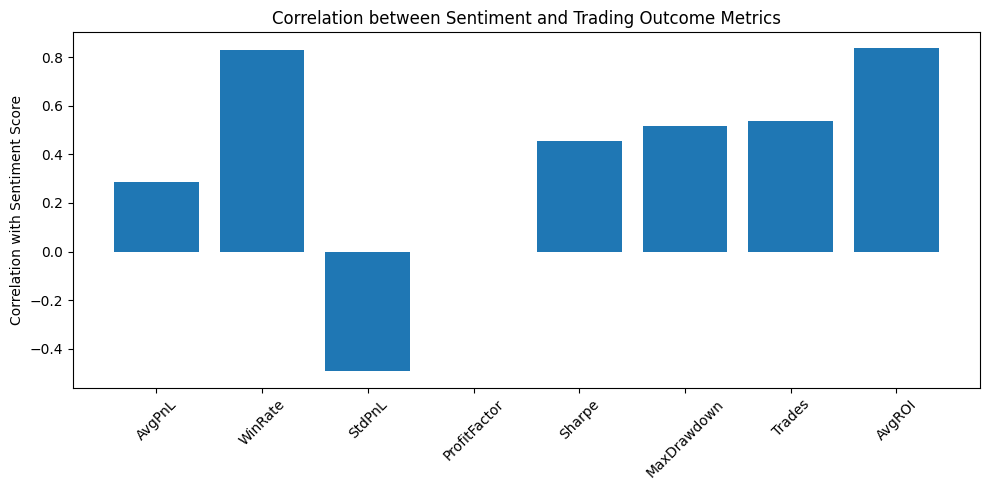

In [17]:
sentiment_metrics['sentiment_score'] = sentiment_metrics['classification'].map(sentiment_order)
metrics_to_check = ['AvgPnL', 'WinRate', 'StdPnL', 'ProfitFactor', 'Sharpe', 'MaxDrawdown', 'Trades', 'AvgROI']
correlations = {}
for metric in metrics_to_check:
    corr = sentiment_metrics[['sentiment_score', metric]].corr().iloc[0,1]
    correlations[metric] = corr

print("Correlation between sentiment_score and trading outcome metrics:")
for metric, corr in correlations.items():
    print(f"{metric}: {corr:.3f}")

plt.figure(figsize=(10, 5))
plt.bar(correlations.keys(), correlations.values())
plt.ylabel('Correlation with Sentiment Score')
plt.title('Correlation between Sentiment and Trading Outcome Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 18. Correlation Heatmap: Sentiment Score vs Trading Metrics

Display a heatmap of correlations between sentiment score and trading metrics.

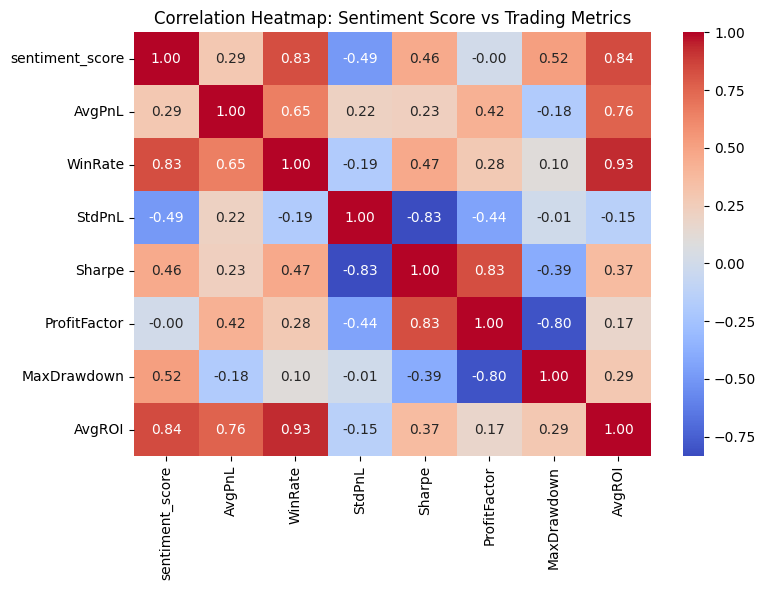

In [18]:
corr = sentiment_metrics[['sentiment_score', 'AvgPnL', 'WinRate', 'StdPnL', 'Sharpe', 'ProfitFactor', 'MaxDrawdown', 'AvgROI']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Sentiment Score vs Trading Metrics')
plt.tight_layout()
plt.show()

## 19. Bar Plot: Top 5 Risk-Seeking Traders

Plot the top 5 traders with the highest standard deviation of PnL (StdPnL) as a bar chart.

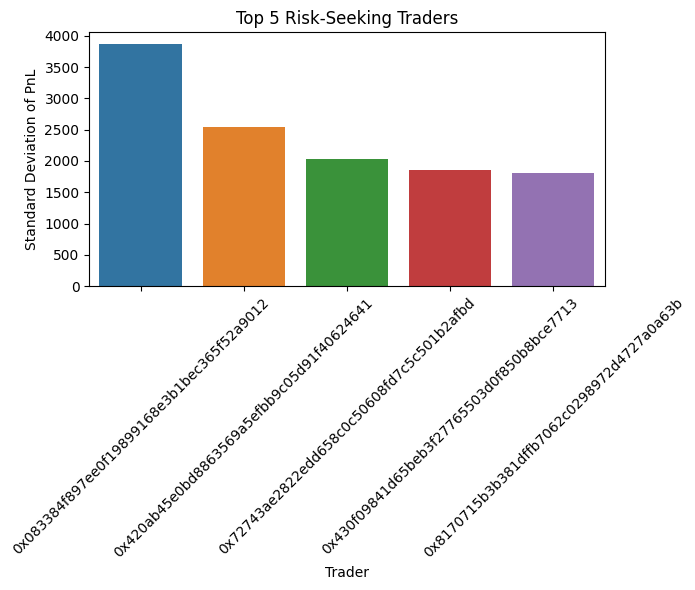

In [19]:
risk_traders = trader_metrics.sort_values('StdPnL', ascending=False).head(5)
plt.figure(figsize=(7, 6))
sns.barplot(data=risk_traders, x='Account', y='StdPnL')
plt.title('Top 5 Risk-Seeking Traders')
plt.xlabel('Trader')
plt.ylabel('Standard Deviation of PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 20. Bar Plot: Top 5 Stable Traders

Plot the top 5 traders with the highest Sharpe ratio as a bar chart.

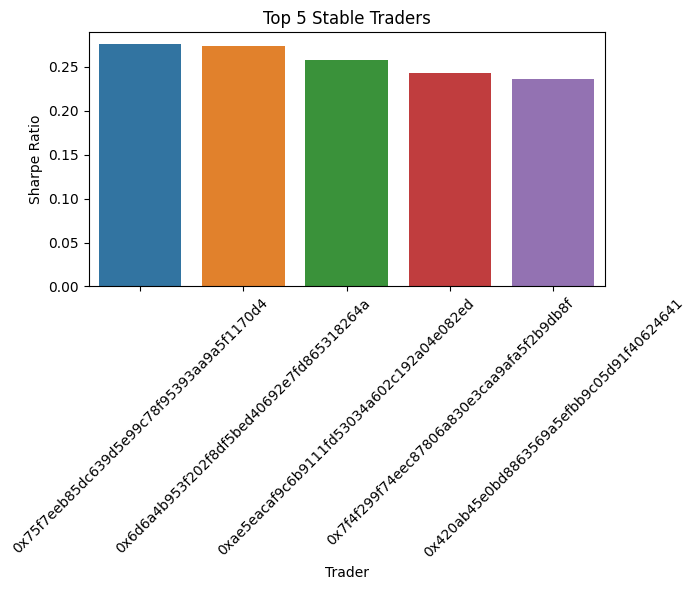

In [20]:
stable_traders = trader_metrics.sort_values('Sharpe', ascending=False).head(5)
plt.figure(figsize=(7, 6))
sns.barplot(data=stable_traders, x='Account', y='Sharpe')
plt.title('Top 5 Stable Traders')
plt.xlabel('Trader')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 21. Trader Stats Aggregation and Ranking

Aggregate trader statistics by account and classification, flatten columns, and rank traders within each classification.

In [21]:
trader_stats = df.groupby(['Account', 'classification']).agg({
    'Closed PnL': ['mean', 'sum', 'count'],
    'Size USD': 'sum',
    'Fee': 'sum'
}).reset_index()
# Flatten MultiIndex columns
trader_stats.columns = ['_'.join(col).strip('_') for col in trader_stats.columns.values]
# Rank traders within each classification
trader_stats['Rank'] = trader_stats.groupby('classification')['Closed PnL_sum'].rank(ascending=False)
display(trader_stats.head())

,Account,classification,Closed PnL_mean,Closed PnL_sum,Closed PnL_count,Size USD_sum,Fee_sum,Rank
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,2096.127273,1.152870e+05,55,1372739.97,137.273975,1.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,-42.626810,-4.028234e+04,945,11415855.67,1795.973591,30.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,504.956060,1.126052e+06,2230,33674859.92,3883.421052,1.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-151.066687,-4.501787e+04,298,8787994.16,920.973085,28.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,786.751910,5.035212e+04,64,2001704.46,601.046531,7.0


## 22. Bar Plot: Top 5 Traders by Total Closed PnL

Plot the top 5 traders by total Closed PnL using a bar chart.

C:\Users\chidw\AppData\Local\Temp\ipykernel_15832\3868300174.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


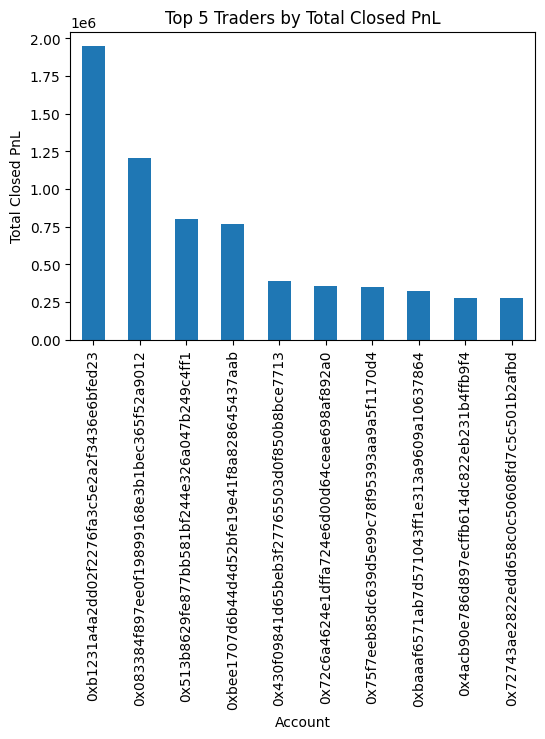

In [22]:
top_5 = trader_stats.groupby('Account')['Closed PnL_sum'].sum().sort_values(ascending=False).head(10)
ax = top_5.plot(kind='bar', figsize=(6, 4), title='Top 5 Traders by Total Closed PnL')
ax.set_ylabel('Total Closed PnL')
plt.tight_layout()
plt.show()

## 23. Pivot Table and Consistent Performers

Create a pivot table of mean Closed PnL by account and classification, and identify traders with positive mean PnL in all regimes.

In [23]:
pivot = trader_stats.pivot_table(index='Account', columns='classification', values='Closed PnL_mean')
# Consistent performers: high mean PnL in all regimes
consistent = pivot.dropna().loc[(pivot > 0).all(axis=1)]
print("Consistent positive performers across all regimes:")
display(consistent)
print(f"Number of consistent traders: {consistent.shape[0]}")

Consistent positive performers across all regimes:


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Account,,,,,
0x2c229d22b100a7beb69122eed721cee9b24011dd,5.150940,59.069977,8.520507,94.926072,25.400729
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,5.966690,23.788269,9.636811,12.270198,6.077773
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,212.986053,122.730863,63.280540,115.126658,146.616004
0x4f93fead39b70a1824f981a54d4e55b278e9f760,44.699822,3.304861,100.670431,31.182379,77.731232
0x6d6a4b953f202f8df5bed40692e7fd865318264a,14.901568,412.793781,3.201823,126.578850,20.624933
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,61.663224,44.452713,34.290075,44.901572,26.204841
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,4.396778,13.666356,5.830094,6.368698,2.897345
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,252.500000,27.507620,11.556168,0.857500,137.647761
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,6.831415,684.181428,68.909290,86.018421,33.761522


Number of consistent traders: 10


## 24. Bar Plot: Top 5 Consistent Traders Across All Regimes

Plot the top 5 consistent traders (by mean Closed PnL across all regimes) as a bar chart.

C:\Users\chidw\AppData\Local\Temp\ipykernel_15832\175524577.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


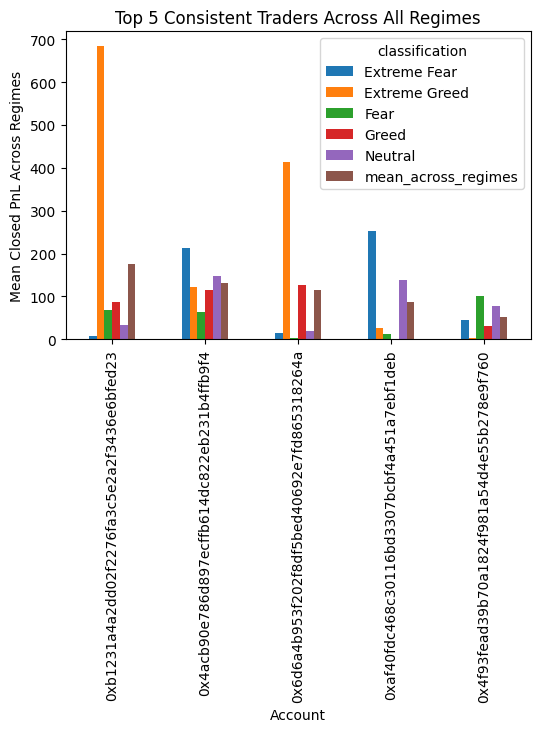

In [24]:
consistent['mean_across_regimes'] = consistent.mean(axis=1)
sorted_consistent = consistent.sort_values(by='mean_across_regimes', ascending=False)
top_5_consistent_traders = sorted_consistent.head()
ax = top_5_consistent_traders.plot(kind='bar', figsize=(6, 4), title='Top 5 Consistent Traders Across All Regimes')
ax.set_ylabel('Mean Closed PnL Across Regimes')
plt.tight_layout()
plt.show()

## 25. Contrarian Traders Analysis and Bar Plot

Identify traders with positive PnL in 'Extreme Fear' and 'Fear' regimes and plot the top 5 as a bar chart.

Contrarian performers (positive PnL in Extreme Fear and Fear):


classification,Extreme Fear,Fear
Account,,
0x083384f897ee0f19899168e3b1bec365f52a9012,2096.127273,504.956060
0x2c229d22b100a7beb69122eed721cee9b24011dd,5.150940,8.520507
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,5.966690,9.636811
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,212.986053,63.280540
0x4f93fead39b70a1824f981a54d4e55b278e9f760,44.699822,100.670431
0x6d6a4b953f202f8df5bed40692e7fd865318264a,14.901568,3.201823
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1410.794152,689.551175
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,61.663224,34.290075
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,36.068831,38.900950


C:\Users\chidw\AppData\Local\Temp\ipykernel_15832\2587841386.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


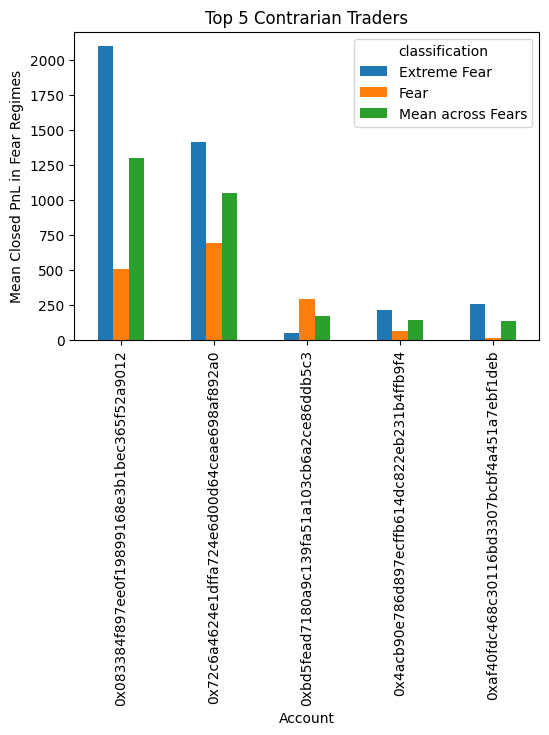

In [25]:
contrarian = pivot[(pivot['Extreme Fear'] > 0) & (pivot['Fear'] > 0)]
print("Contrarian performers (positive PnL in Extreme Fear and Fear):")
display(contrarian[['Extreme Fear', 'Fear']])
contrarian = contrarian[['Extreme Fear', 'Fear']]
contrarian['Mean across Fears'] = contrarian.mean(axis=1)
contrarian = contrarian.sort_values(by='Mean across Fears', ascending=False)
ax = contrarian.head().plot(kind='bar', figsize=(6, 4), title='Top 5 Contrarian Traders')
ax.set_ylabel('Mean Closed PnL in Fear Regimes')
plt.tight_layout()
plt.show()